In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [10]:
name=['vc_tnblx','vc_hzxb','area_type','addrcode','diagnosis_age','disease_id1','week','inf_day','inf_weeek','inf_month','target','group_id']
tnb_jiehe_data = pd.read_csv("./jiehe_tnb.csv",encoding='utf-8')
data = tnb_jiehe_data[name]
data['addrcode']=data['addrcode']/100
data['addrcode']=data['addrcode']%10000
data['addrcode'] = data['addrcode'].astype(int)
data = data[data['addrcode']<1199]  #删除外省人
data.head(1)

E:\Users\wang\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
E:\Users\wang\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
E:\Users\wang\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

,vc_tnblx,vc_hzxb,area_type,addrcode,diagnosis_age,disease_id1,week,inf_day,inf_weeek,inf_month,target,group_id
0,3,2,1,109,34,131,124,16,3,1,b,16


In [11]:
data.groupby('group_id').count()

,vc_tnblx,vc_hzxb,area_type,addrcode,diagnosis_age,disease_id1,week,inf_day,inf_weeek,inf_month,target
group_id,,,,,,,,,,,
3,9,9,9,9,9,9,9,9,9,9,9
4,17,17,17,17,17,17,17,17,17,17,17
6,18,18,18,18,18,18,18,18,18,18,18
7,5,5,5,5,5,5,5,5,5,5,5
8,143,143,143,143,143,143,143,143,143,143,143
9,12,12,12,12,12,12,12,12,12,12,12
16,470,470,470,470,470,470,470,470,470,470,470
17,68,68,68,68,68,68,68,68,68,68,68
18,2909,2909,2909,2909,2909,2909,2909,2909,2909,2909,2909


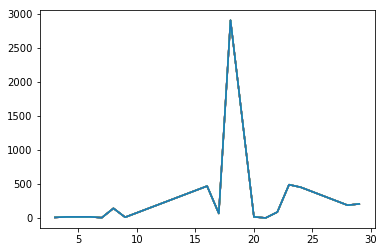

In [12]:
group_id=data.groupby('group_id').count()
plt.plot(group_id)
plt.show()

In [13]:
class_le = LabelEncoder()
data['target']=class_le.fit_transform(data['target'])

In [14]:
X_train,X_test,y_train,y_test = train_test_split(data[name[0:11]],data[name[11]],test_size=0.4,random_state=42)
clf = DecisionTreeClassifier(max_depth=6,min_samples_split=6)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.61850277868584502

In [15]:
clf.score(X_test,y_test)

0.56960784313725488

In [16]:
tr_predict = clf.predict(X_test)
print(classification_report(y_test,tr_predict))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         5
          4       0.00      0.00      0.00         4
          6       0.00      0.00      0.00         8
          7       0.00      0.00      0.00         3
          8       0.29      0.09      0.14        56
          9       0.00      0.00      0.00         5
         16       0.19      0.15      0.17       195
         17       0.00      0.00      0.00        37
         18       0.64      0.91      0.75      1164
         20       0.00      0.00      0.00         2
         21       0.00      0.00      0.00         1
         22       0.00      0.00      0.00        40
         23       0.48      0.21      0.29       196
         24       0.24      0.08      0.12       177
         28       0.22      0.23      0.23        70
         29       0.00      0.00      0.00        77

avg / total       0.47      0.57      0.49      2040



E:\Users\wang\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
forest = RandomForestClassifier(n_estimators=3000,random_state=42,n_jobs=3)
forest.fit(X_train,y_train)
forest.score(X_train,y_train)

0.99967309578293562

In [18]:
forest.score(X_test,y_test)

0.62990196078431371

In [19]:
tr_predict = clf.predict(X_test)
print(classification_report(y_test,tr_predict))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         5
          4       0.00      0.00      0.00         4
          6       0.00      0.00      0.00         8
          7       0.00      0.00      0.00         3
          8       0.29      0.09      0.14        56
          9       0.00      0.00      0.00         5
         16       0.19      0.15      0.17       195
         17       0.00      0.00      0.00        37
         18       0.64      0.91      0.75      1164
         20       0.00      0.00      0.00         2
         21       0.00      0.00      0.00         1
         22       0.00      0.00      0.00        40
         23       0.48      0.21      0.29       196
         24       0.24      0.08      0.12       177
         28       0.22      0.23      0.23        70
         29       0.00      0.00      0.00        77

avg / total       0.47      0.57      0.49      2040



In [20]:
feat_labels = data.columns[:-1]
importance = forest.feature_importances_
indices = np.argsort(importance)[::-1]
for f in range(X_train.shape[1]):
    print("%2d %-*s %f"%(f+1,30,feat_labels[f],importance[indices[f]]))

 1 vc_tnblx                       0.206005
 2 vc_hzxb                        0.199831
 3 area_type                      0.174551
 4 addrcode                       0.157763
 5 diagnosis_age                  0.085919
 6 disease_id1                    0.041768
 7 week                           0.037374
 8 inf_day                        0.030931
 9 inf_weeek                      0.026050
10 inf_month                      0.026047
11 target                         0.013760


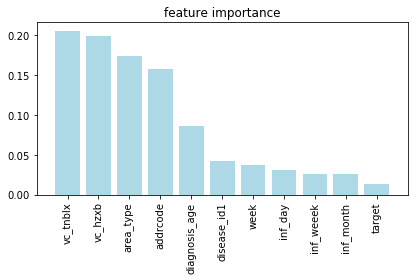

In [21]:
plt.title("feature importance")
plt.bar(range(X_train.shape[1]),importance[indices],color='lightblue',align='center')
plt.xticks(range(X_train.shape[1]),feat_labels,rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()